In [80]:
import pandas as pd

fish = pd.read_csv('./fish.csv')
fish.head()

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])
fish_target = fish['Species'].to_numpy()
print(fish_target)

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' '

In [81]:
#역시나 훈련/테스트 세트 나눠주고
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [82]:
#표준점수로 전처리도 해줘야지
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [83]:
#그리고, k근접 이웃 분류기를 만들어보자
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.classes_) # .classes_ : KNeighborsClassifier에서 정렬된 타깃값은 여기에 저장되어있음. (알파벳 순)
print(kn.predict(test_scaled[:5]))

proba = kn.predict_proba(test_scaled[:5]) #5개의 샘플, 7개의 생선
#.predict_proba() : 예측에 대한 확률값을 계산해주는 메소드.
print(np.round(proba, decimals = 4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#로지스틱 회귀
#이름은 회귀지만, 놀랍게도 대표적인 분류 알고리즘임..
#아래와 같은 선형방정식을 학습하는 것까지는 선형회귀와 동일함.
#z=a×(무게)+b×(길이)+c×(대각선)+d×(높이)+e×(두께)+f
#근데 이 z를 그대로 쓰면 '회귀'지만, 시그모이드 함수에 넣으면 0~1의 값이 됨. = 즉, 확률처럼 볼 수 있게 되는 거임!

In [ ]:
#시그모이드 함수(또는 로지스틱 함수): 자연상수 e를 (−z)로 거듭제곱하고 1을 더한 값에, 역수를 취하면, 아래와 같은 그래프를 얻을 수 있음. z가 0일 때는 0.5가 됨.
# z>0 : 양성 / z<0 : 음성 → 이렇게 반 잘라서 생각하기도 편함. (z=0은 보통 음성에 포함시킴. 사이킷런에서도 그러함.)

In [84]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 불리언 인덱싱
# 전체 7마리 다 하기 전에, 2마리(도미/빙어)만 가지고 이진분류 연습해보자.
train_bream_smelt = train_scaled[bream_smelt_indexes] #위에서 true로 바뀐 애들의 인덱스만 갖고 옴
target_bream_smelt = train_target[bream_smelt_indexes] # 이진분류 때 쓸 데이터 새로 준비한 거임

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5])) #음성 , 양성

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


❗이진분류에서는, 1열이 음성 클래스이고 2열이 양성 클래스임
= 앞에서 사이킷런은 문자열 그대로 쓸 땐 알파벳순으로 한다고 했었으니,
빙어가 양성이 되겠네 (if. 도미를 양성으로 쓰고 싶으면, 2장에서 했듯이 0/1 지정해주면 됨)
= 위의 예측 결과와 비교해보면, Bream 4개 / Smelt 1개니까 맞아떨어지네 ㅇㅇ

In [85]:
print(lr.coef_, lr.intercept_) #로지스틱이 학습한 계수를 확인해보면 회귀방정식도 써볼 수 있음

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [86]:
decisions = lr.decision_function(train_bream_smelt[:5]) # z값을 출력해줌
print(decisions)

from scipy.special import expit #사이파이에 제공하는 시그모이드 함수로 확률 구해보니
print(expit(decisions)) # z값을 시그모이드 함수에 대입

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


다중분류 by 로지스틱 회귀

모델 훈련
- 이제 전체 7마리 다 써서 훈련. 방식은 이진분류 때와 동일함.
- max_iter : 충분한 훈련을 위해 반복횟수를 지정하는 매개변수 (기본값=100)
- C : (릿지의 alpha처럼) 규제의 양을 조절하는 매개변수. (기본값=1)

In [87]:
lr = LogisticRegression(C=20, max_iter=1000) # 규제 약간 완화하고, 반복횟수 늘림
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [88]:
proba = lr.predict_proba(test_scaled[:5]) #처음 5개 샘플에 대한 예측 결과 보니까 각각 7개 생선 중 하나로 예측 잘 구해줌
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


❗다중분류에서는, 클래스 개수만큼 확률을 출력함.
= 위의 예측결과와 비교해보면 각각 가장 높은 확률이랑 맞아떨어짐 ㅇㅇ
= (해석) 첫번째 샘플은 Bream일 확률 0 / Parkki일 확률 0.014 / Perch일 확률 0.842 / Pike일 확률 0 / Roach일 확률 0.135 / Smelt일 확률 0.007 / Whitefish일 확률 0.003 이었던 것이다.

In [89]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [90]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [91]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


❗근데 다중분류는, 이진분류(샘플당 z값 1개)와 달리, z값이 여러 개라서 다 합치면 1을 넘어갈 수 있음 = 한 샘플 내의 7개 z값을 다 합치면 1이 되도록 적당히 압축 필요
➡️ 그게 바로, 소프트맥스 함수 !!! (그래서 여기선 시그모이드 X)

In [92]:
from scipy.special import softmax # softmax() : 여러 개의 선형방정식의 출력값(z)을 0~1 사이로 압축하고, 총합이 1이 되게 만드는 함수.

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [93]:
import pandas as pd

wine = pd.read_csv('./wine.csv')
wine.describe() #각 열마다 간략한 통계치들을 출력해주는 메소드
# 결과 보면 확실히 열마다 스케일 차이가 있다. => 나중에 표준화해야겠어.

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [94]:
# 와인을 구별하는 무제니가 'class'를 타깃데이터로 하고 나머지는 입력데이터로
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [95]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) # 데이터가 많아서 20%만 학습

In [96]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [97]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [98]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [99]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


"알코올 도수*0.512720274 + 당도*1.6733911 - pH*0.68767781 + 1.81777902를 계산한 값이 0보다 크면 화이트와인입니다..!" 

결정 트리 알고리즘을 사용해볼까? 스무고개처럼 질문을 하나씩 던져서 정답을 찾아가는 방식이야.

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 훈련세트 점수 높네?
print(dt.score(test_scaled, test_target)) # 과대적합된거 같은데? 

0.996921300750433
0.8592307692307692


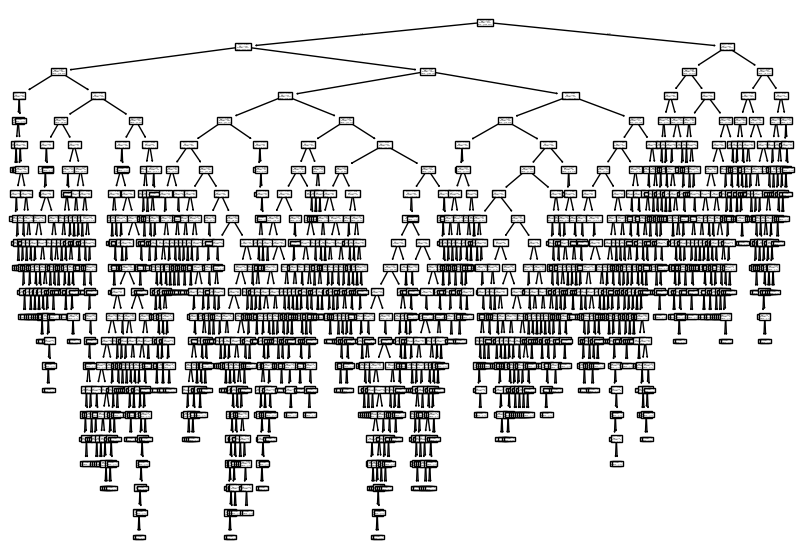

In [101]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

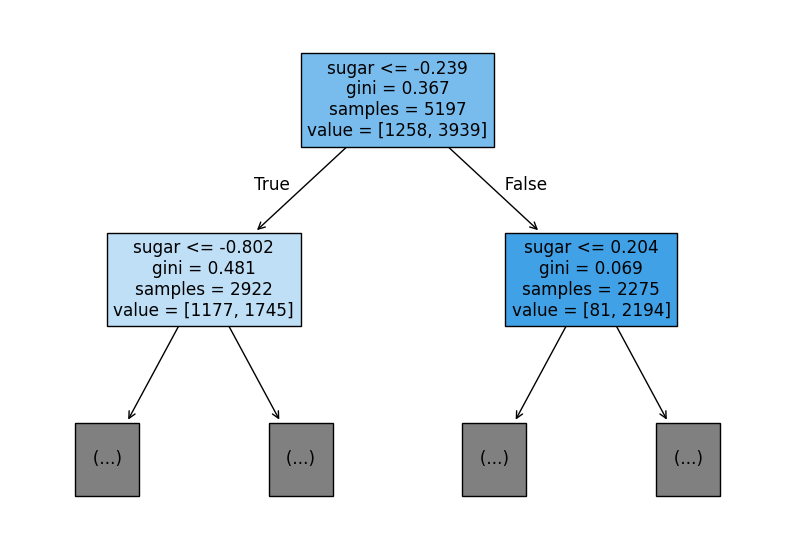

In [102]:
#max_depth: 루트 노드 및에 몇 층을 더 그릴지 설정하는 매개변수
#filled: 클래스의 비율에 맞게 노드를 색칠해주는 매개변수
#features_names: 특성의 이름을 전달하는 매개변수 (없으면 'sugar'가 아니라 x[1]로 나옴)
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

불순도
- 노드를 나누는 기준이 되는 수치로, criterion 매개변수로 설정가능(기본값: gini)
- 지니 불순도 = 1 - (음성클래스비율^2 + 양성 클래스 비율^2)
  - 불순도가 0.5인 경우: 두 클래스가 정확히 반반으로 나눠져서 구분의 의미가 없는 최악의 노드
  - 불순도가 0인 겨우: 노드에 한 클래스만 있는, 즉 완벽히 구분된 최선의 노드 = 'pure node'
- 결정트리 모델은, 부모노드와 자식노드의 불순도 차이가 크도록 노드를 나눔.
- 이 차이를 정보 이득이라고 부르며, 노드를 순수하게 나눌수록 정보 이득이 커짐.
- {부모의 불순도 - (왼쪽노드 샘플 수/부모노드 샘플 수) * 왼쪽노드 불순도 - (오른쪽노드 샘플 수/부모노드 샘플 수) * 오른쪽오느 불순도} = 정보이득
- 물론 이 불순도를 우리가 직접 계산하는 건 아니고, DecisionTreeClassifier에서 불순도 차이가 크도록 알아서 노드를 분할시킨다는 거임.

가지치기
- 위의 빼곡한 트리처럼 무작정 깊이 훈련시키면, 훈련세트에만 과대적합 되어버림.
- 위의 트리처럼 깊이 제한이 아예 없으면, 리프노드가 순수노드가 될 때까지 하게 됨.
- 그래서 가지치기가 필요! -> 가장 간단한 방법은 max_depth로 깊이 지정하기.
- (결정트리는 선형회귀처럼 가중치가 있는 게 아니라서 L1, L2 규제 같은 건 쓸 수 없음)

In [119]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


[0.12345626 0.86862934 0.0079144 ]


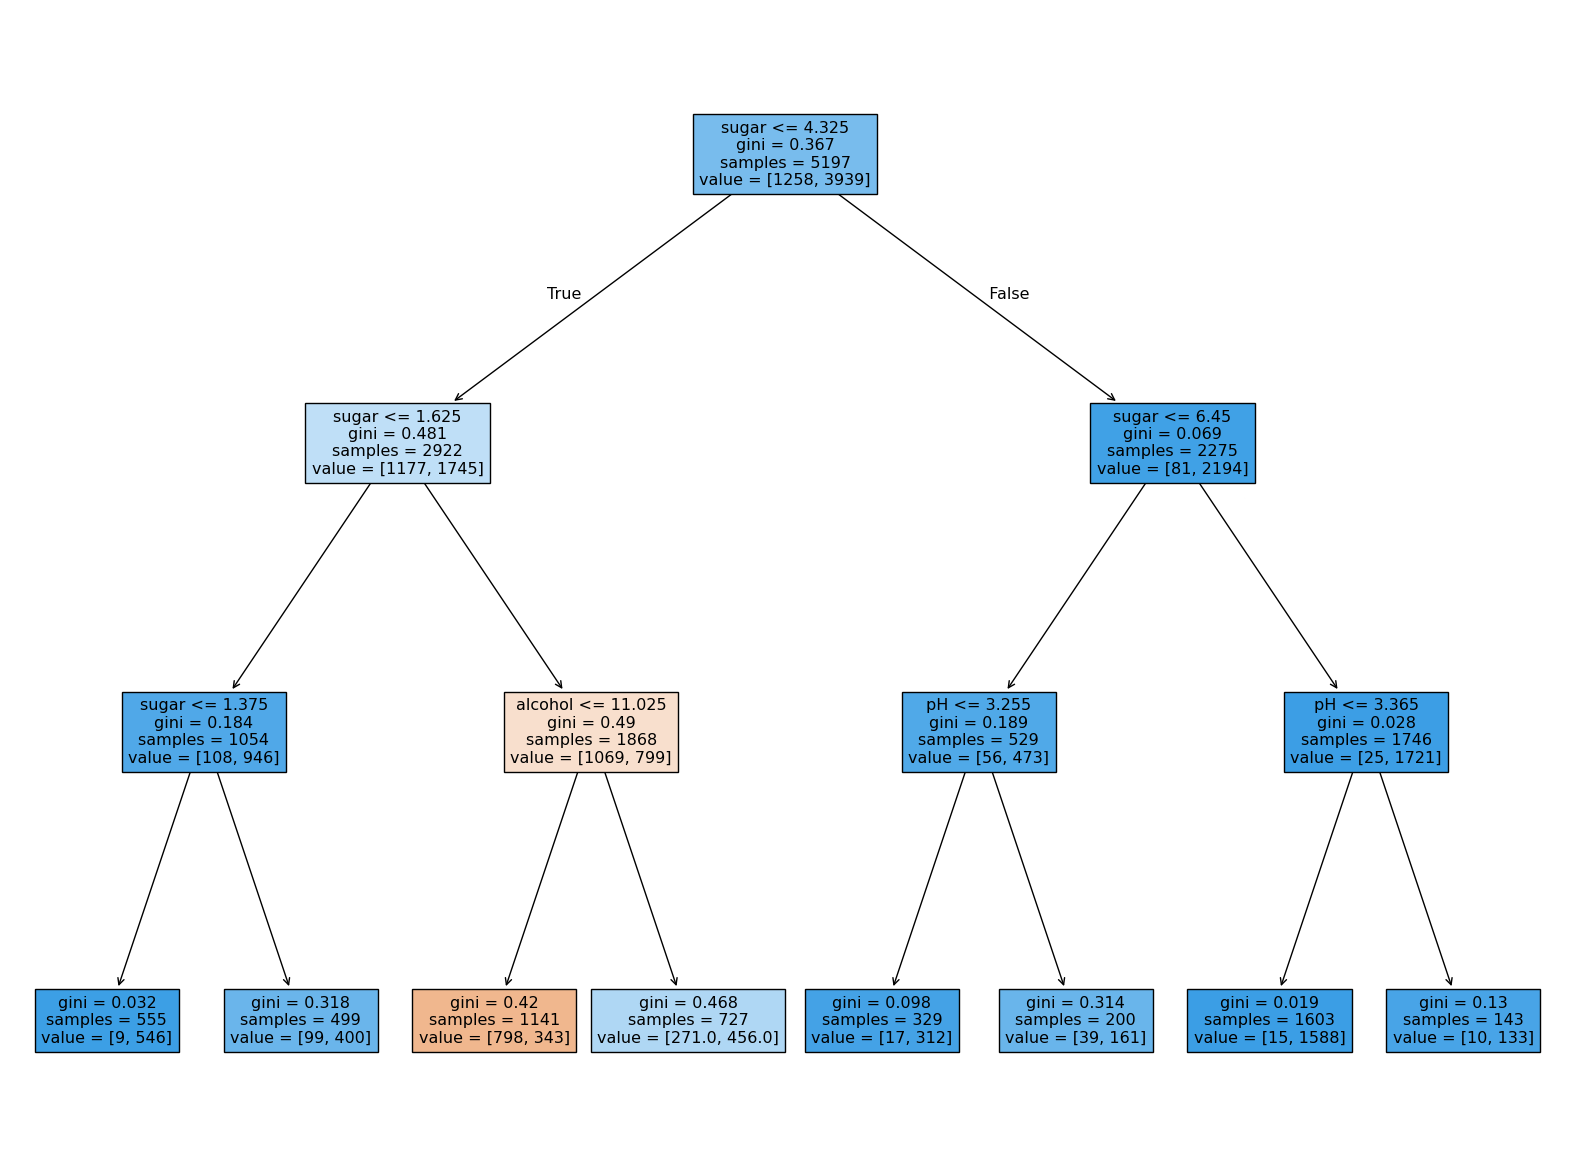

In [120]:
print(dt.feature_importances_)
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

결정트리의 장점
- 사실, 표준화 전처리가 필요없음.
- 특성 중요도를 계산해줌(.feature_importances_)
- 그래프를 직관적으로 이해하기 좋음
- 회귀모델보다 설명하기가 쉬움

결정트리 모델의 딜레마
- 깊이에 제한을 두지 않고 끝까지 훈련시키면 score 점수가 매우 높게 나온다.
- 하지만, 훈련세트에 과적합되는 문제가 생긴다.
- 과적함을 규제하기 위해 깊이를 제한하면, 성능이 낮아진다.

정리:
신상품 '캔 와인' 출시! 근데 레드.화이트와인 표시가 누락 -> 알콜 농도, 당도, ph 값을 바탕으로 레드/화이트여부를 분류해야 함(이진분류)
-> 로지스틱 회귀모델로 분류함. -> 이해 불가 -> 결정트리 모델을 사용 -> 불순도를 기준으로 노드를 분할하며 아래로 내려가서, 최종 노드를 보고 클래스 예측 -> 질문을 통해 클래스를 찾아가는 과정이 직관적으로 그려짐 + 성능도 더 높게 나온다. -> 과적합 발생 시 가지치기로 해결!!!